지도학습 
- 분류와 회귀


지도학습 알고리즘

In [1]:
pip install mglearn

한글깨짐 방지

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


예제에 사용할 데이터 셋

1. 이진 분류 데이터셋(forge) 확인하기

데이터 셋 다운로드하기

In [3]:
import mglearn
import matplotlib.pyplot as plt

# 데이터 셋 만들기

X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


데이터 확인하기

In [4]:
print('X.shape : ',X.shape)
print('y.shape : ',y.shape)

X.shape :  (26, 2)
y.shape :  (26,)


In [5]:
y 
# 0과 1로 되어있으므로 이진분류를 사용해보기

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


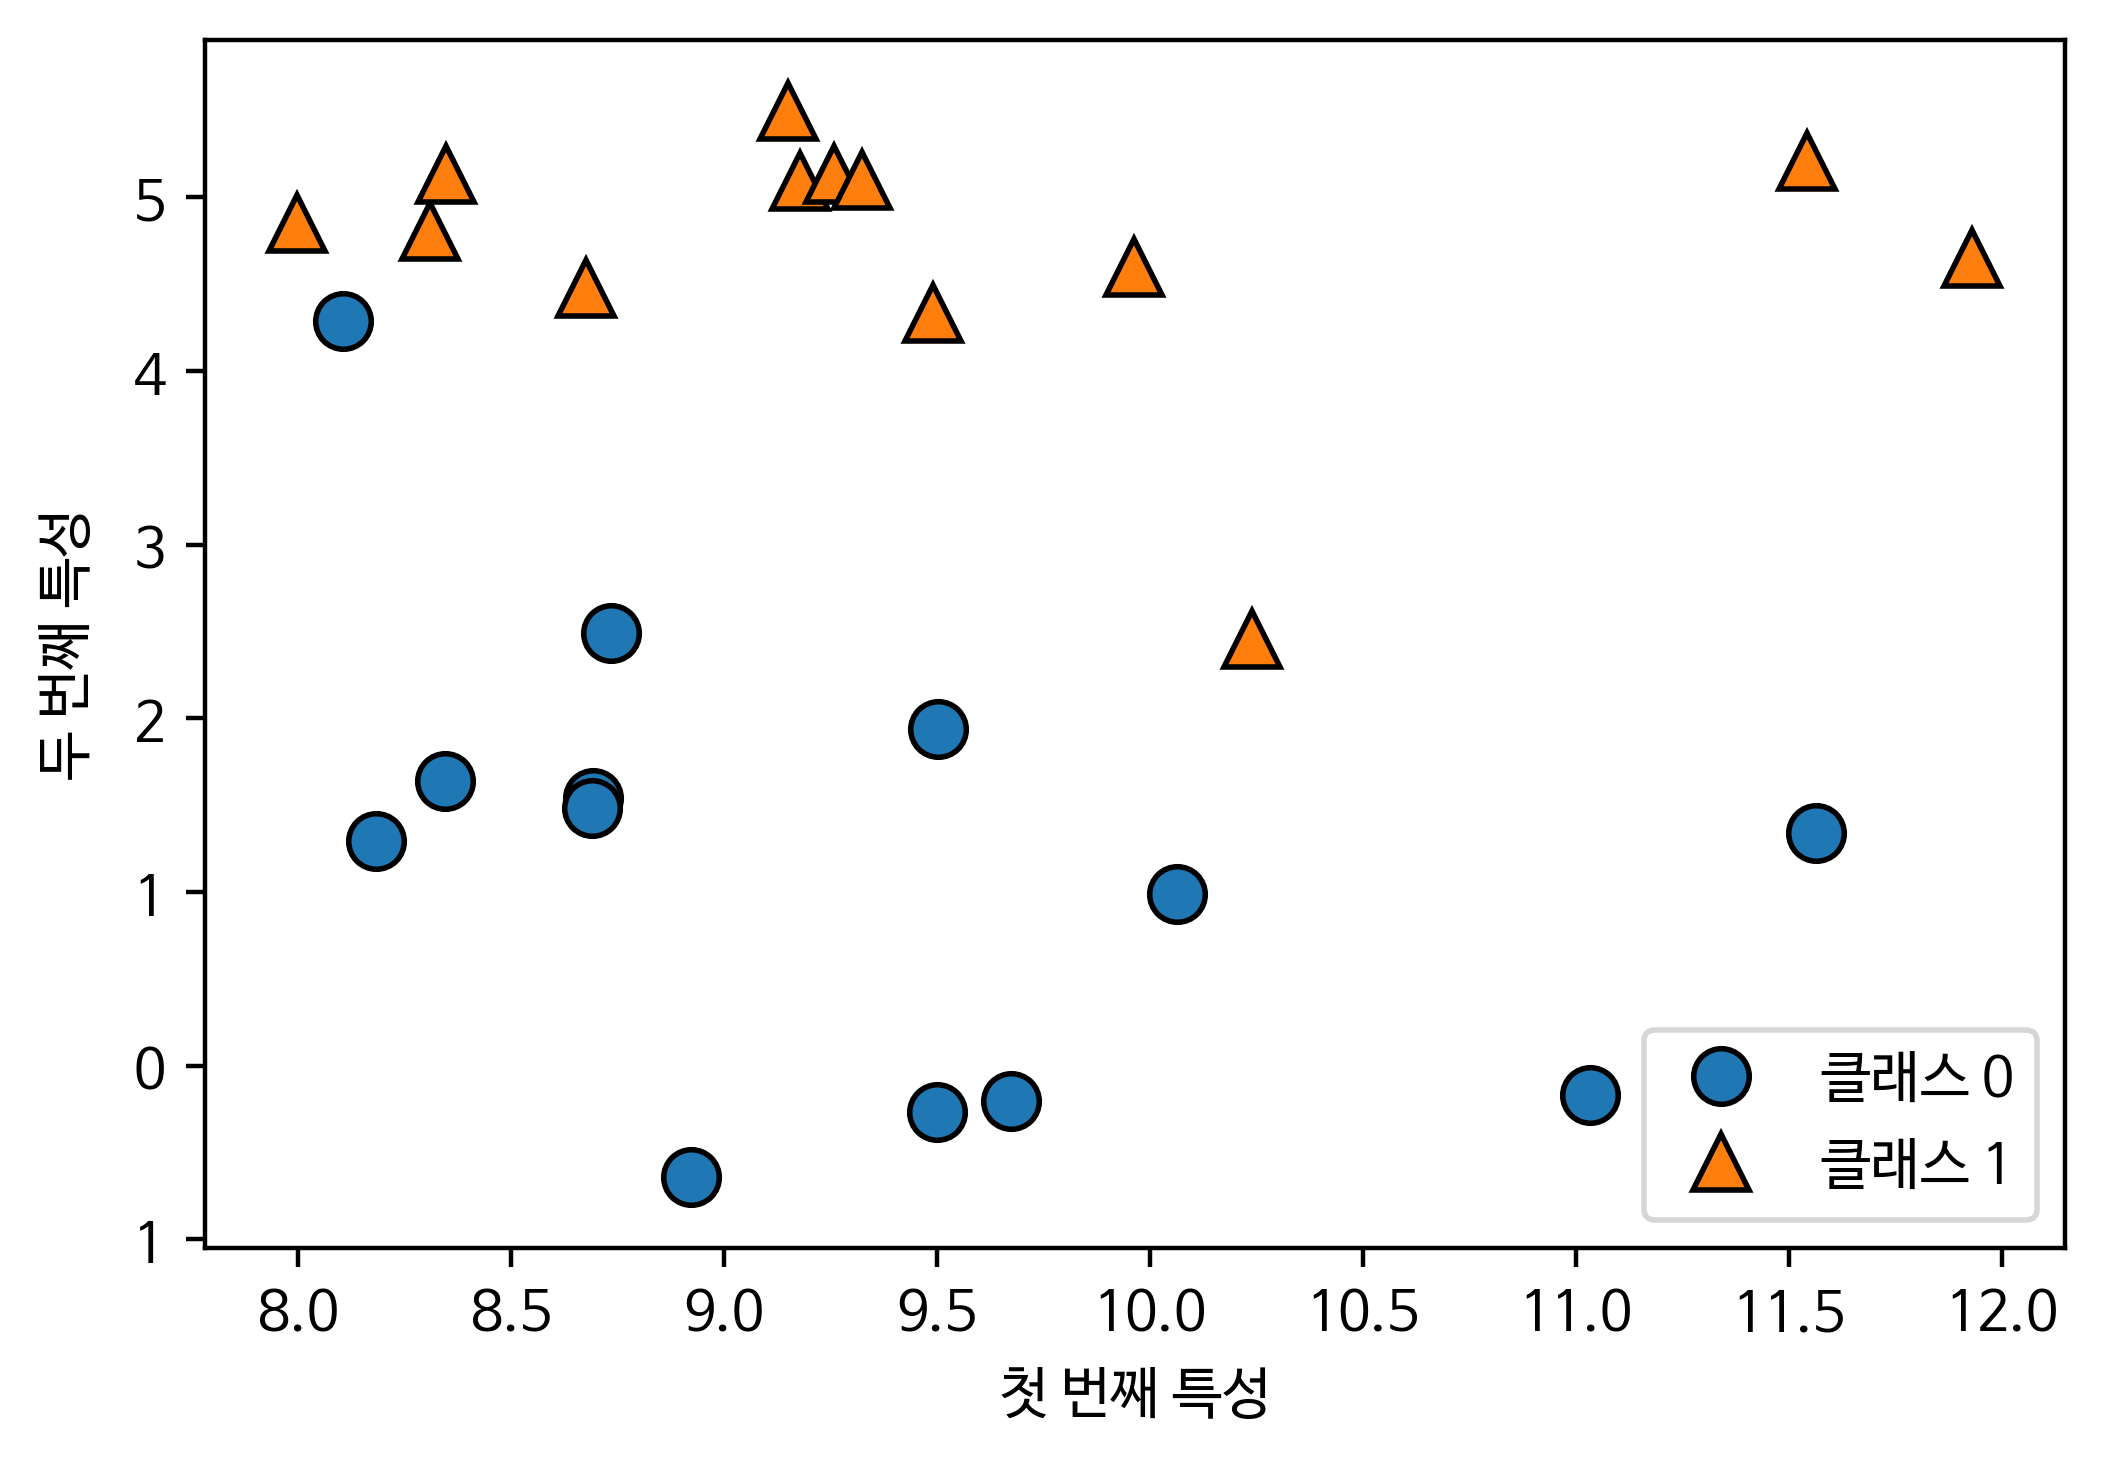

In [6]:
plt.figure(dpi=200)
plt.rc('font', family='NanumBarunGothic')

# 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')

plt.show()

2. 회귀 데이터셋(wave) 확인하기

데이터 다운로드

In [14]:
X, y = mglearn.datasets.make_wave(n_samples=40)

데이터 확인하기

In [15]:
print('X.shape : ',X.shape)
print('y.shape : ',y.shape)

X.shape :  (40, 1)
y.shape :  (40,)


In [16]:
X # 1개의 feature 
# 특성이 적은 데이터 셋에서 얻은 직관 -> 특성이 많은 데이터 셋으로 발전 가능

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504]])

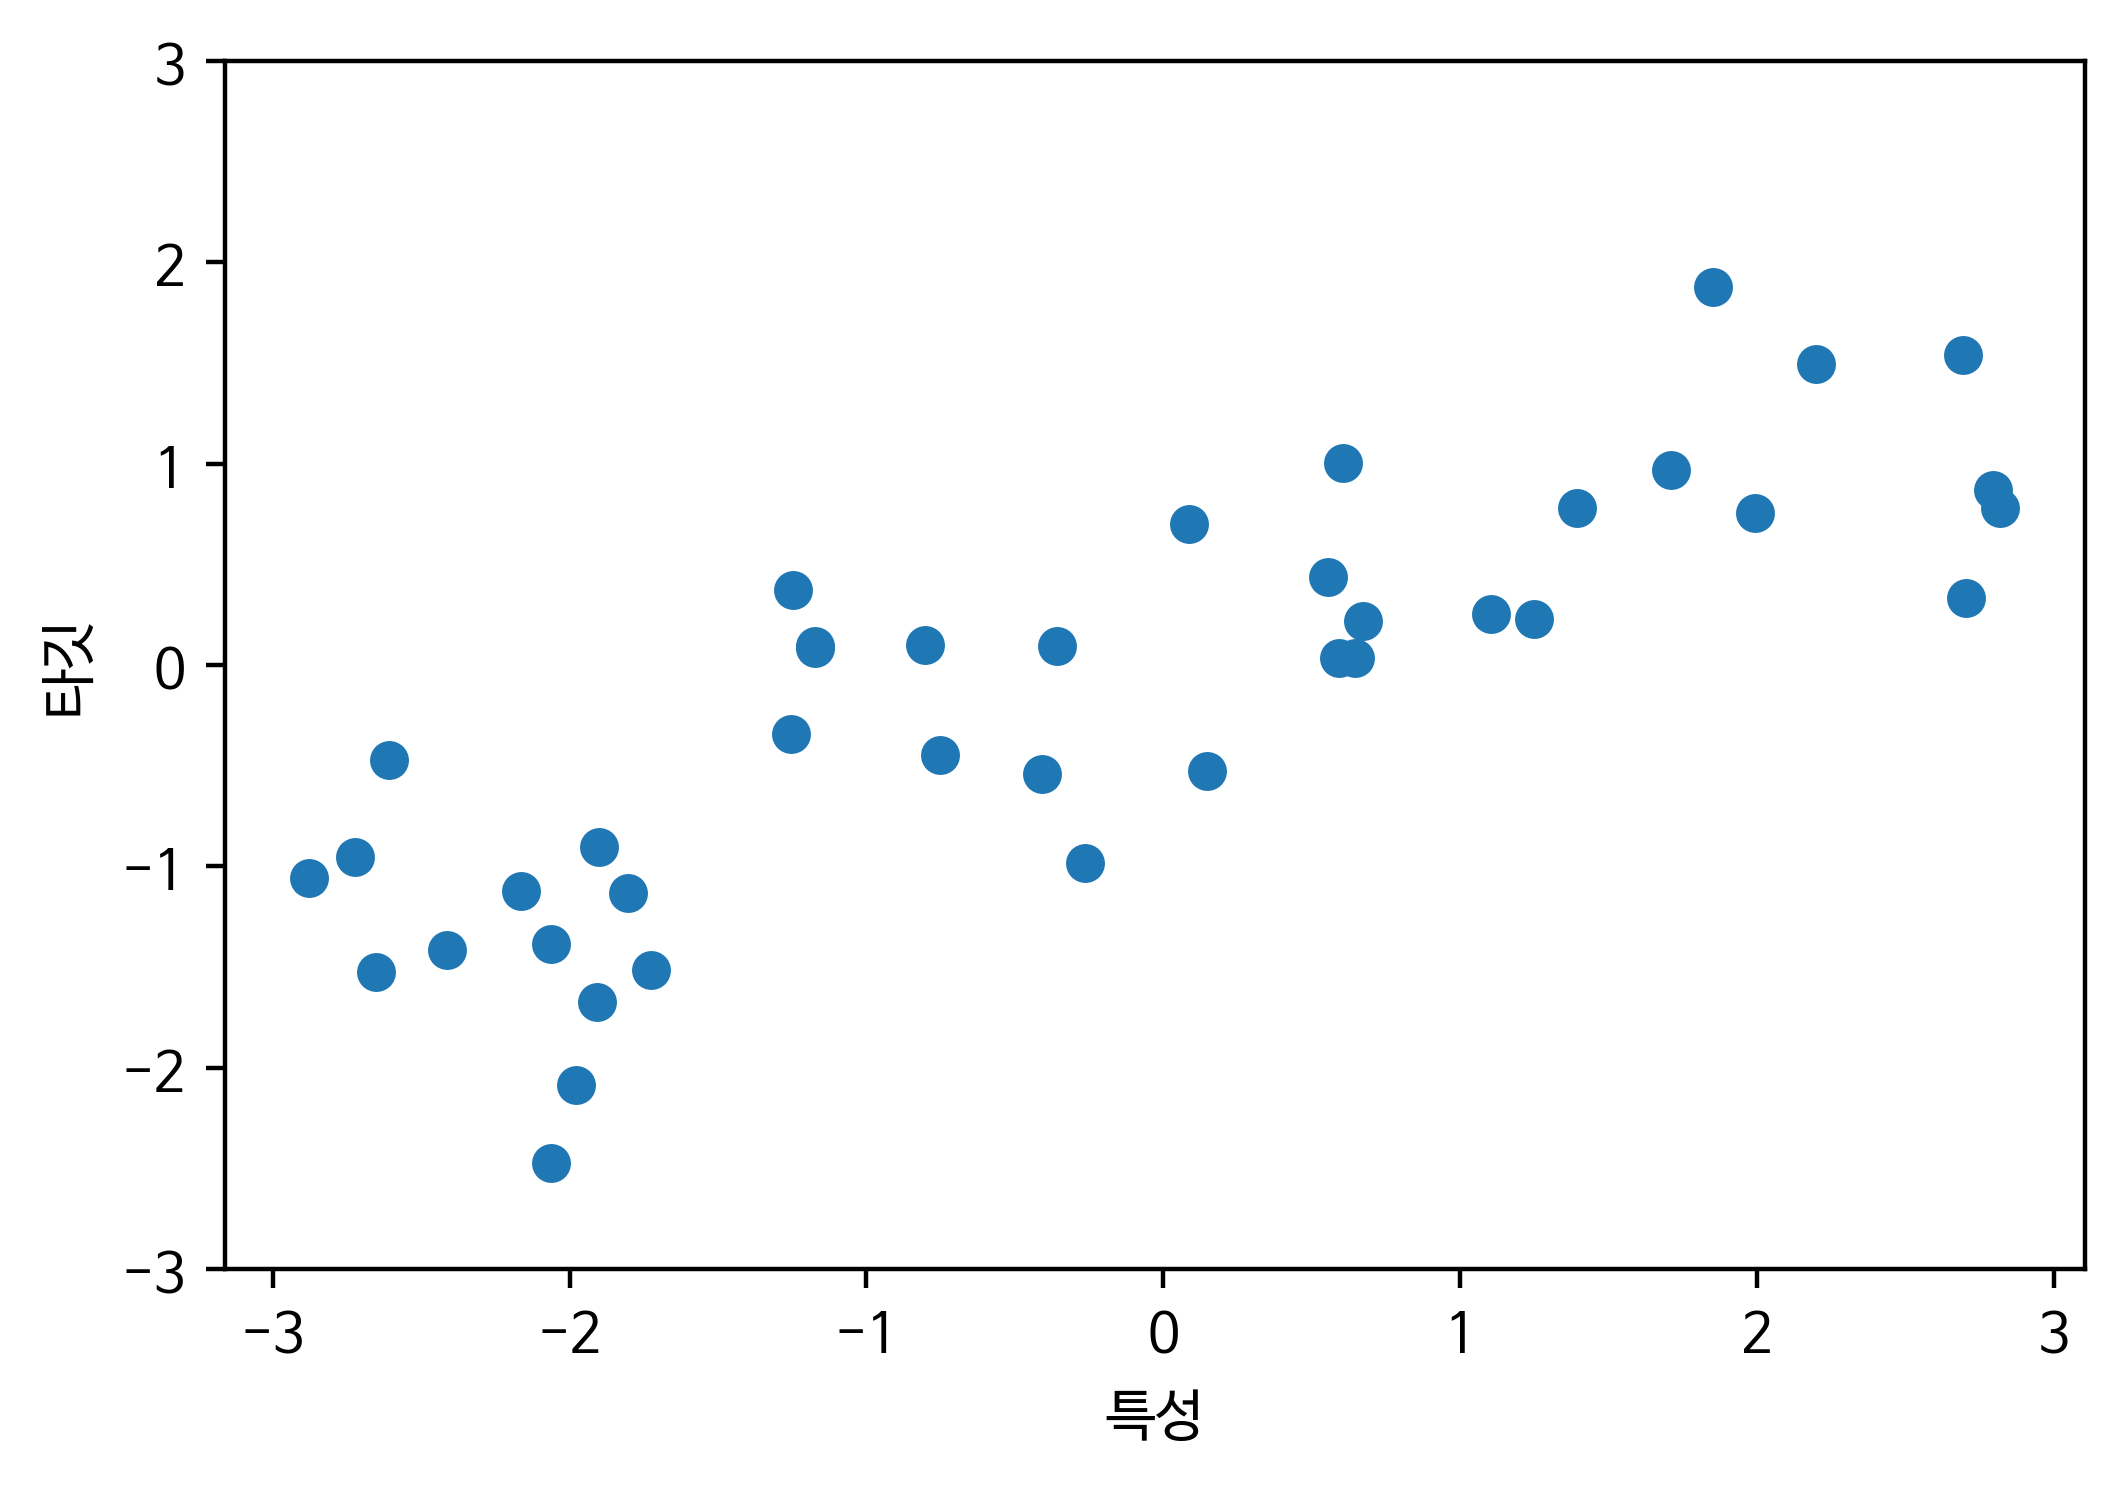

In [20]:
# 산점도 그리기

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.figure(dpi=200)
plt.rc('font', family='NanumBarunGothic')

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

plt.show()

위스콘신 유방암 데이터셋

분류 문제정의: 위스콘신 유방암 데이터 셋을 사용한 악성 종양(Label,1) 예측하기

데이터 준비하기
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys()) # 데이터셋 키 확인하기

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


데이터 확인하기

In [24]:
cancer.data.shape # 유방암 데이터의 형태 / 569건, 특성 30개

(569, 30)

In [27]:
# 클래스별 샘플(타겟) 갯수

import numpy as np

# 양성, 악성 종양의 비율
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [28]:
# 데이터의 특성 확인하기

cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

보스턴 주택가격 데이터 셋


회귀 문제정의: 보스톤 주택 가격 데이터 셋을 사용한 보스턴 주변의 주택 평균 가격 예측하기</br>
데이터 준비하기
(https://www.kaggle.com/c/boston-housing)


In [29]:
from sklearn.datasets import load_boston

boston = load_boston()



데이터 확인하기

In [30]:
# 데이터 형태 확인
boston.data.shape # 506개 데이터, 13개 특성

(506, 13)

In [31]:
# 데이터의 특성(feature) 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')